In [13]:
import nextnanopy as nn
import os
# sweep_input_path = r"C:\Users\splatt\nextnanopy_projects\sweep_example.in"

# my_sweep = nn.Sweep({'ALLOY':[0.3,0.6], 'SIZE':[80,100]}, sweep_input_path)
# print(my_sweep)

In [ ]:
base_file_path = r"C:\Users\splatt\nextnanopy_projects\DoubleQuantumWell_6nm_nnp.nnp"
base_file_input = nn.InputFile(base_file_path)
print(base_file_input)

# my_input = nn.InputFile(sweep_input_path)
# my_input.config
# print(my_input)
# my_sweep.save_sweep()

In [ ]:
#setup sweep
barrier_sweep  = nn.Sweep({'QW_SEPARATION':[1.0,2.0,14.0]},base_file_path)
barrier_sweep.save_sweep()
barrier_sweep.input_files

In [ ]:
barrier_widths = [1.0,2.0,14.0]
barrier_sweep.execute_sweep(overwrite = True, show_log = True)


DataFile
fullpath: C:\Users\splatt\Documents\nextnano\Output\DoubleQuantumWell_6nm_nnp_sweep__QW_SEPARATION\DoubleQuantumWell_6nm_nnp__QW_SEPARATION_1.0_\bias_00000\Quantum\quantum_region\Gamma\energy_spectrum_k00000.dat
Coordinates: 1 datasets
	name: no. - unit:  - shape: (4,) - dim: 0
Variables: 1 datasets
	name: Energy - unit: eV - shape: (4,)
[0.03475797 0.07297718 0.16574644 0.17610185]
DataFile
fullpath: C:\Users\splatt\Documents\nextnano\Output\DoubleQuantumWell_6nm_nnp_sweep__QW_SEPARATION\DoubleQuantumWell_6nm_nnp__QW_SEPARATION_2.0_\bias_00000\Quantum\quantum_region\Gamma\energy_spectrum_k00000.dat
Coordinates: 1 datasets
	name: no. - unit:  - shape: (4,) - dim: 0
Variables: 1 datasets
	name: Energy - unit: eV - shape: (4,)
[0.04218174 0.06550446 0.16584609 0.17599111]
DataFile
fullpath: C:\Users\splatt\Documents\nextnano\Output\DoubleQuantumWell_6nm_nnp_sweep__QW_SEPARATION\DoubleQuantumWell_6nm_nnp__QW_SEPARATION_14.0_\bias_00000\Quantum\quantum_region\Gamma\energy_spectrum

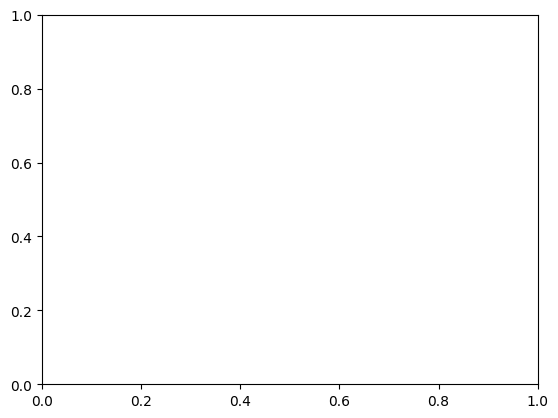

In [20]:
#now load in each of those sweeps and extract the E1 and E2
import matplotlib.pyplot as plt
barrier_widths = [1.0,2.0,14.0]
fig_compare,ax_compare = plt.subplots()
fig,axs = plt.subplots(1,len(barrier_widths))
filebase = r"C:\Users\splatt\Documents\nextnano\Output\DoubleQuantumWell_6nm_nnp_sweep__QW_SEPARATION"
#extract E1 and E2 from each sweep and plot
bias = 'bias_00000'
quantum_subfolder = r'bias_00000\Quantum\quantum_region\Gamma'
for barrier_ind in range(0,len(barrier_widths)):
    #extract the file
    sweep_filename =  'DoubleQuantumWell_6nm_nnp__QW_SEPARATION_' + str(barrier_widths[barrier_ind]) + '_'
    sweep_path = os.path.join(filebase, sweep_filename)
    input_file_check = nn.InputFile(os.path.join(sweep_path,sweep_filename+ '.nnp'))
    # print(input_file_check)
    quantum_sims_path = os.path.join(sweep_path, quantum_subfolder)
    energy_spectrum = nn.DataFile(os.path.join(quantum_sims_path, 'energy_spectrum_k00000.dat'),'nextnano++')
    probabilities = nn.DataFile(os.path.join(quantum_sims_path, 'probabilities_k00000.dat'),'nextnano++')
    band_edge = nn.DataFile(os.path.join(sweep_path, bias,'bandedges.dat'),'nextnano++')
    print(energy_spectrum)
    energies = energy_spectrum.variables['Energy']
    print(energies.value)
    axs[barrier_ind].plot(band_edge.coords['x'].value, band_edge.variables['Gamma'].value)
    axs[barrier_ind].plot(probabilities.coords['x'].value, probabilities.variables['Psi^2_1'].value)
    axs[barrier_ind].plot(probabilities.coords['x'].value, probabilities.variables['Psi^2_2'].value)
    


In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
x = datafile_1d.coords['x']
gamma = datafile_1d.variables['Gamma']
efermi = datafile_1d.variables['electron_Fermi_level']
ax.plot(x.value, gamma.value, label='Gamma Bandedge')
ax.plot(x.value,efermi.value, label='Electron Fermi Level')
ax.set_xlabel(x.label)
ax.set_ylabel(gamma.label)
ax.legend()
fig.tight_layout()